In [1]:
import pandas as pd

In [2]:
ratings = pd.read_csv('ratings.csv')
print(ratings.shape)
ratings.head()

(981756, 3)


,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [3]:
ratings.drop_duplicates(["user_id","book_id"], inplace = True) 
ratings.shape

(979478, 3)

In [4]:
books = pd.read_csv('books.csv')
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [5]:
books = books.drop(['best_book_id', 'work_id', 'books_count', 'isbn', 'isbn13', 'language_code',
                    'work_ratings_count', 'work_text_reviews_count', 'image_url', 'small_image_url', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5'], axis=1, errors='ignore')
books.head()

,id,book_id,authors,original_publication_year,original_title,title,average_rating,ratings_count
0,1,2767052,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",4.34,4780653
1,2,3,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479
2,3,41865,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",3.57,3866839
3,4,2657,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,4.25,3198671
4,5,4671,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,3.89,2683664


In [6]:
books.drop_duplicates('title', inplace=True)
books.shape

(9964, 8)

In [7]:
books_with_nan = books.isnull().any(axis=1)
for index, row in books[books_with_nan].iterrows():
    ratings = ratings[ratings.book_id != row.book_id]
ratings.shape

(977601, 3)

In [8]:
books.dropna(subset=['original_title'], inplace=True)
books.shape

(9381, 8)

In [9]:
# Top 10 most rated books
top_rated = books.sort_values(by='ratings_count', ascending=False)
top_rated.head(10)

,id,book_id,authors,original_publication_year,original_title,title,average_rating,ratings_count
0,1,2767052,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",4.34,4780653
1,2,3,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479
2,3,41865,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",3.57,3866839
3,4,2657,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,4.25,3198671
4,5,4671,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,3.89,2683664
5,6,11870085,John Green,2012.0,The Fault in Our Stars,The Fault in Our Stars,4.26,2346404
6,7,5907,J.R.R. Tolkien,1937.0,The Hobbit or There and Back Again,The Hobbit,4.25,2071616
7,8,5107,J.D. Salinger,1951.0,The Catcher in the Rye,The Catcher in the Rye,3.79,2044241
9,10,1885,Jane Austen,1813.0,Pride and Prejudice,Pride and Prejudice,4.24,2035490
8,9,960,Dan Brown,2000.0,Angels & Demons,"Angels & Demons (Robert Langdon, #1)",3.85,2001311


In [10]:
# Top 10 most popular books
popular = books.sort_values(by='average_rating', ascending=False)
popular.head(10)

,id,book_id,authors,original_publication_year,original_title,title,average_rating,ratings_count
3627,3628,24812,Bill Watterson,2005.0,The Complete Calvin and Hobbes,The Complete Calvin and Hobbes,4.82,28900
861,862,17332218,Brandon Sanderson,2014.0,Words of Radiance,"Words of Radiance (The Stormlight Archive, #2)",4.77,73572
8853,8854,95602,Francine Rivers,1993.0,Mark of the Lion Trilogy,Mark of the Lion Trilogy,4.76,9081
4482,4483,24814,Bill Watterson,1996.0,It's a Magical World: A Calvin and Hobbes Coll...,It's a Magical World: A Calvin and Hobbes Coll...,4.75,22351
6360,6361,70489,Bill Watterson,1996.0,There's Treasure Everywhere: A Calvin and Hobb...,There's Treasure Everywhere: A Calvin and Hobb...,4.74,16766
421,422,862041,J.K. Rowling,1998.0,Complete Harry Potter Boxed Set,"Harry Potter Boxset (Harry Potter, #1-7)",4.74,190050
6919,6920,24815,Bill Watterson,1992.0,The Indispensable Calvin and Hobbes: A Calvin ...,The Indispensable Calvin and Hobbes,4.73,14597
6589,6590,59715,Bill Watterson,1990.0,The Authoritative Calvin and Hobbes,The Authoritative Calvin and Hobbes: A Calvin ...,4.73,16087
3752,3753,10,J.K. Rowling,2005.0,"Harry Potter Collection (Harry Potter, #1-6)","Harry Potter Collection (Harry Potter, #1-6)",4.73,24618
9565,9566,70487,Bill Watterson,1992.0,Attack of the Deranged Mutant Killer Monster S...,Attack of the Deranged Mutant Killer Monster S...,4.72,9713


In [11]:
books = books[['id', 'original_title']]
books = books.rename(columns={'id':'book_id'})
books.head()

,book_id,original_title
0,1,The Hunger Games
1,2,Harry Potter and the Philosopher's Stone
2,3,Twilight
3,4,To Kill a Mockingbird
4,5,The Great Gatsby


In [12]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [13]:
ratings_df = ratings.merge(books)
ratings_df.head()

,book_id,user_id,rating,original_title
0,1,314,5,The Hunger Games
1,1,439,3,The Hunger Games
2,1,588,5,The Hunger Games
3,1,1169,4,The Hunger Games
4,1,1185,4,The Hunger Games


In [14]:
ratings_df = ratings_df.rename(columns={'original_title':'title'})
ratings_df.head()

,book_id,user_id,rating,title
0,1,314,5,The Hunger Games
1,1,439,3,The Hunger Games
2,1,588,5,The Hunger Games
3,1,1169,4,The Hunger Games
4,1,1185,4,The Hunger Games


In [15]:
book_mat = ratings_df.pivot_table(index ='user_id', columns = 'title', values = 'rating')

In [16]:
book_mat.fillna(0, inplace=True)

In [17]:
book_mat.head()

title,,A Monster Calls,Animal Farm & 1984,"Burned (Burned, #1)",Call the midwife : a true story of the East End in the 1950s,"Carry On, Warrior: Thoughts on Life Unarmed",Carter Beats the Devil,Crown of Shadows,Daemon,De Imitatione Christi,...,電撃デイジー 1,青の祓魔師 1,青の祓魔師 2,高校デビュー 1,黑暗森林,黒執事 I [Kuroshitsuji I],黒執事 II [Kuroshitsuji II],黒執事 III [Kuroshitsuji III],엄마를 부탁해,채식주의자
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
hunger_games_user_ratings = book_mat['The Hunger Games']

In [19]:
similar_to_hunger_games = book_mat.corrwith(hunger_games_user_ratings)

In [20]:
corr_hunger_games = pd.DataFrame(similar_to_hunger_games, columns = ['Correlation']).dropna()

In [21]:
corr_hunger_games.head()

,Correlation
title,
,0.005143
A Monster Calls,0.002447
Animal Farm & 1984,0.078380
"Burned (Burned, #1)",-0.001784
Call the midwife : a true story of the East End in the 1950s,-0.001818


In [22]:
corr_hunger_games.sort_values(by='Correlation', ascending=False).head(10)

,Correlation
title,
The Hunger Games,1.000000
Catching Fire,0.593945
The Help,0.572485
Harry Potter and the Philosopher's Stone,0.554728
Mockingjay,0.546894
The Secret Garden,0.487082
The Great Gatsby,0.479306
Män som hatar kvinnor,0.476155
Angels & Demons,0.471883


In [23]:
from scipy.sparse import csr_matrix

df_book_features = ratings_df.pivot(index='book_id',columns='user_id',values='rating').fillna(0)
mat_book_features = csr_matrix(df_book_features.values)

In [24]:
num_users = len(ratings_df.user_id.unique())
num_items = len(ratings_df.book_id.unique())
print('There are {} unique users and {} unique movies in this data set'.format(num_users, num_items))

There are 53057 unique users and 9362 unique movies in this data set


In [25]:
df_ratings_cnt_tmp = pd.DataFrame(ratings_df.groupby('rating').size(), columns=['count'])
df_ratings_cnt_tmp.head()

,count
rating,
1,18207
2,59085
3,233835
4,335082
5,272644


In [26]:
expected_number_ratings = num_users * num_items
zero_ratings_count = expected_number_ratings - ratings_df.shape[0]

In [27]:
print(zero_ratings_count)

495800781


In [28]:
top_row = pd.DataFrame({'count': zero_ratings_count}, index=[0])
df_ratings_cnt = pd.concat([top_row, df_ratings_cnt_tmp]).reset_index(drop = True)
df_ratings_cnt.head()

,count
0,495800781
1,18207
2,59085
3,233835
4,335082


In [29]:
df_ratings_cnt['rating_score'] = df_ratings_cnt.index
df_ratings_cnt.reset_index(drop=True)

,count,rating_score
0,495800781,0
1,18207,1
2,59085,2
3,233835,3
4,335082,4
5,272644,5


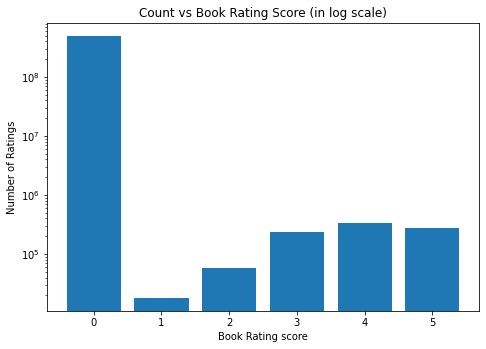

In [30]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df_ratings_cnt['rating_score'], df_ratings_cnt['count'], log=True)
ax.set_xlabel("Book Rating score")
ax.set_ylabel("Number of Ratings")
ax.set_title("Count vs Book Rating Score (in log scale)")
plt.show()

In [31]:
df_books_cnt = pd.DataFrame(ratings_df.groupby('book_id').size(), columns=['count'])

In [32]:
popularity_threshold = 60
popular_books = list(df_books_cnt[df_books_cnt['count'] >= popularity_threshold].index)
print(len(popular_books))

9341


In [33]:
df_filtered = ratings_df[ratings_df.book_id.isin(popular_books)]
df_filtered.shape

(917753, 4)

In [34]:
df_users_cnt = pd.DataFrame(ratings_df.groupby('user_id').size(), columns=['count'])

In [35]:
inactivity_threshold = 50
active_users = list(df_users_cnt[df_users_cnt['count'] >= inactivity_threshold].index)
print(len(active_users))

4548


In [36]:
df_filtered = df_filtered[df_filtered.user_id.isin(active_users)]
df_filtered.shape

(385882, 4)

In [37]:
book_user_mat = df_filtered.pivot(index='book_id', columns='user_id', values='rating').fillna(0)
book_user_mat_sparse = csr_matrix(book_user_mat.values)

In [38]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
model_knn.fit(book_user_mat_sparse)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [39]:
from fuzzywuzzy import fuzz

def find_matches(input_book):
    matches = []
    for index, row in books.iterrows():
        ratio = fuzz.ratio(row.original_title.lower(), input_book.lower())
        if ratio >= 65:
            matches.append((row.original_title, index, ratio))
    matches = sorted(matches, key=lambda x: x[2])[::-1]
    if not matches:
        print('No match found')
        return
    print('Found possible matches: {0}\n'.format([x[0] for x in matches]))
    return matches[0][1]

/Users/cdgamaro/Library/Python/3.8/lib/python/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [40]:
def recommend(input_book):
    model_knn.fit(book_user_mat_sparse)
    
    index = find_matches(input_book)
    
    print('Making inferences...\n')
    distances, indices = model_knn.kneighbors(book_user_mat_sparse[index], n_neighbors=11)
    similarities = (1 - distances.flatten()).tolist()
    raw_recommends = sorted(list(zip(indices.flatten().tolist(), similarities)), key=lambda x: x[1], reverse=True)[1:]
    print('Recommendations for {}:'.format(input_book))
    for i, (idx, dist) in enumerate(raw_recommends):
        print('{0}: {1}, with a similarity of {2}'.format(i+1, books[books.book_id == idx+1].original_title.item(), dist))

In [41]:
recommend('To Kill a Mockingbird')

Found possible matches: ['To Kill a Mockingbird', 'Mockingbird']

Making inferences...

Recommendations for To Kill a Mockingbird:
1: The Great Gatsby, with a similarity of 0.7033347660035132
2: Harry Potter and the Philosopher's Stone, with a similarity of 0.6107407979116195
3: The Help, with a similarity of 0.5795553705196098
4: Angels & Demons , with a similarity of 0.5748391847833695
5: Nineteen Eighty-Four, with a similarity of 0.5747564924596483
6: Of Mice and Men , with a similarity of 0.5671678309205324
7: Divergent, with a similarity of 0.5603539880374008
8: Eat, pray, love: one woman's search for everything across Italy, India and Indonesia, with a similarity of 0.5473103900006062
9: Harry Potter and the Half-Blood Prince, with a similarity of 0.5433514413229681
10: The Lightning Thief, with a similarity of 0.541721387329726


In [42]:
recommend('Lord of the Flies')

Found possible matches: ['Lord of the Flies ', 'Blood of the Fold', 'The Lord of the Rings', 'Soul of the Fire', 'Froi of the Exiles', 'Out of the Easy', 'Lord of Light', 'War of the Twins', 'The Lady of the Rivers', 'Julie of the Wolves', 'Born of the Night']

Making inferences...

Recommendations for Lord of the Flies:
1: The Red Tent, with a similarity of 0.5773644700372413
2: Breaking Dawn, with a similarity of 0.548356359825716
3: A Storm of Swords, with a similarity of 0.5183288388205017
4: The Help, with a similarity of 0.5151615342109205
5: Eat, pray, love: one woman's search for everything across Italy, India and Indonesia, with a similarity of 0.5126639981830516
6: Insurgent, with a similarity of 0.5048862085447572
7: The Great Gatsby, with a similarity of 0.5020643102505622
8: Harry Potter and the Order of the Phoenix, with a similarity of 0.48927453242591534
9: Harry Potter and the Half-Blood Prince, with a similarity of 0.48267129890184624
10: The Hobbit or There and Back 

In [43]:
recommend('The Perks of Being a Wallflower')

Found possible matches: ['The Perks of Being a Wallflower']

Making inferences...

Recommendations for The Perks of Being a Wallflower:
1: Eclipse, with a similarity of 0.4160017773043274
2: Green Eggs and Ham, with a similarity of 0.40929710646741535
3: Män som hatar kvinnor, with a similarity of 0.4056153776211462
4: The Sea of Monsters, with a similarity of 0.4013431765382294
5: The Firm, with a similarity of 0.3972528098663438
6: The Curious Incident of the Dog in the Night-Time, with a similarity of 0.37960843048360604
7: The Da Vinci Code, with a similarity of 0.36806367110572014
8: Harry Potter and the Goblet of Fire, with a similarity of 0.3657598072832656
9: Eragon, with a similarity of 0.36235341091412787
10: Me Talk Pretty One Day, with a similarity of 0.3608415818063522
